In [1]:
"""
Author: Anmolbir Mann 
Email: amann33@gatech.edu 
CS7641 Assignment 3: Unsupervised Learning

This Notebook is mainly for exploring/developing 
see/use final python script, main.py to generate final results
"""

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
import time

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display
plt.ion()

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from unsupervised_learner import process_data, searchk_kmeans, search_components_gm, run_pca, plot_data, plot_tsne, run_ica
from sklearn.manifold import TSNE

RANDOM_SEED = 1994540101
np.random.seed(RANDOM_SEED) # keep results consistent

In [2]:
data = pd.read_csv("data/diabetes.csv")
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

x_train, x_test, y_train, y_test = process_data(x, y)

In [3]:
inertias, clusters_range, best_n_clusters = searchk_kmeans(x_train)

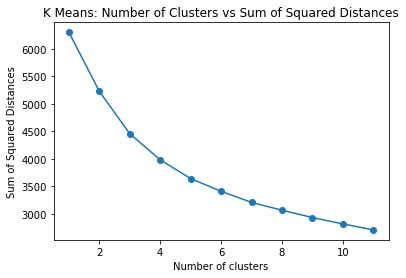

In [4]:
plot_config = {
    "x": clusters_range,
    "y": inertias,
    "xlabel": 'Number of clusters',
    "ylabel": 'Sum of Squared Distances',
    "title": 'K Means: Number of Clusters vs Sum of Squared Distances'
}
plot_data(**plot_config)

In [5]:
result = KMeans(n_clusters=best_n_clusters, init='random', n_init=10, max_iter=100, tol=1e-04, random_state=RANDOM_SEED)
km = result.fit(x_train)

In [6]:
result.n_iter_ < result.max_iter # convergence

True

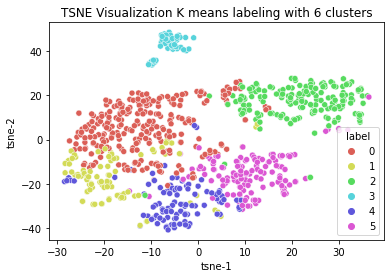

In [7]:
plot_tsne(x_train, result.labels_, best_n_clusters, title=f"TSNE Visualization K means labeling with {best_n_clusters} clusters")

In [8]:
bic_results, component_range, best_n_components = search_components_gm(x_train)

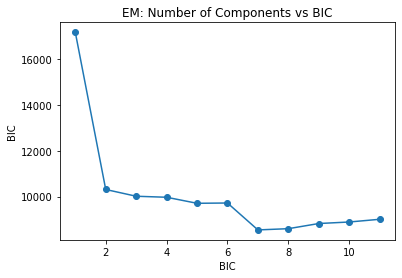

In [9]:
plot_config = {
    "x": component_range,
    "y": bic_results,
    "xlabel": 'BIC',
    "ylabel": 'BIC',
    "title": 'EM: Number of Components vs BIC'
}
plot_data(**plot_config)

In [10]:
result = GaussianMixture(n_components=best_n_components, random_state=RANDOM_SEED, n_init=10)
result.fit(x_train)
labels = result.predict(x_train)

In [11]:
result.n_iter_ < result.max_iter # convergence

True

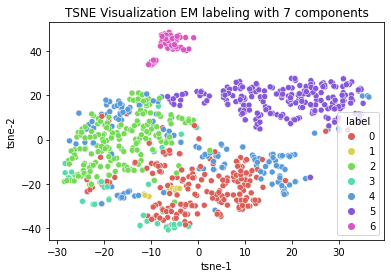

In [12]:
plot_tsne(x_train, labels, best_n_components, title=f"TSNE Visualization EM labeling with {best_n_components} components", perplexity=30.)

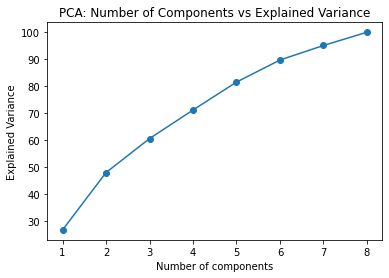

In [13]:
x_pca, num_components = run_pca(x_train)

In [14]:
inertias, clusters_range, best_n_clusters = searchk_kmeans(x_pca)

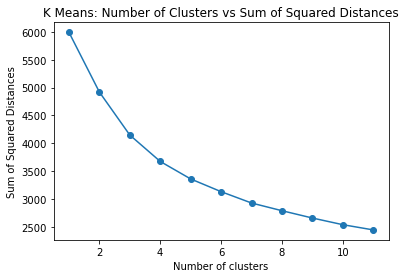

In [15]:
plot_config = {
    "x": clusters_range,
    "y": inertias,
    "xlabel": 'Number of clusters',
    "ylabel": 'Sum of Squared Distances',
    "title": 'K Means: Number of Clusters vs Sum of Squared Distances'
}
plot_data(**plot_config)

In [16]:
result = KMeans(n_clusters=best_n_clusters, init='random', n_init=100, max_iter=100, tol=1e-04, random_state=RANDOM_SEED)
km = result.fit(x_pca)

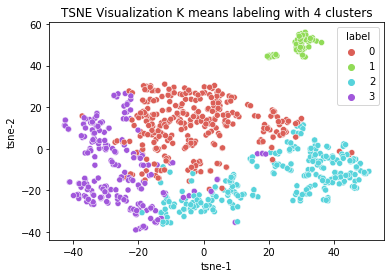

In [17]:
plot_tsne(x_pca, result.labels_, best_n_clusters, title=f"TSNE Visualization K means labeling with {best_n_clusters} clusters", perplexity=20)

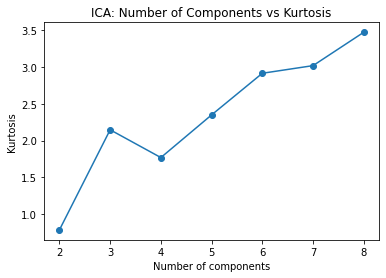

In [28]:
x_ica, n = run_ica(x_train)

In [29]:
inertias, clusters_range, best_n_clusters = searchk_kmeans(x_ica)

In [30]:
result = KMeans(n_clusters=best_n_clusters, init='random', n_init=100, max_iter=100, tol=1e-04, random_state=RANDOM_SEED)
km = result.fit(x_ica)

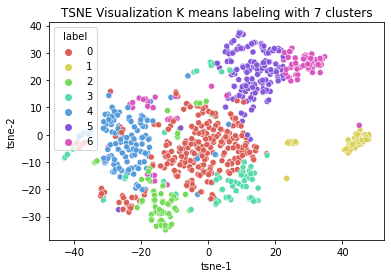

In [34]:
plot_tsne(x_ica, result.labels_, best_n_clusters, title=f"TSNE Visualization K means labeling with {best_n_clusters} clusters", perplexity=30.)

In [22]:
pd.DataFrame(x_train).kurt(axis=0).abs().mean()

2.5025559041878793